# IBM Applied Data Science Capstone Project
## By Tirth Jignesh Raval
## Week 3 Part 2

Get the geographical coordinates of the neighborhoods in Toronto.

## 1. Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
import folium
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
!conda install -c conda-forge lxml --yes
import requests
import lxml.html as lh
print("Libraries imported.")

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Sol

## 2. Scrap data from Wikipedia page into a DataFrame (Based on Previous Part)

In [2]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')
r = requests.get(url)

#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

size_of_col = 3
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 3, the //tr data is not from our table 
    if len(T)!=size_of_col:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1
        
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
df = df.replace(r'\n','', regex=True) 
df.columns = ['PostalCode', 'Borough', 'Neighborhood']
df.drop(df.tail(1).index,inplace=True)

df = df[df.Borough != "Not assigned"].reset_index(drop=True)

df = df.replace(r'/',', ', regex=True) 

for index, row in df.iterrows():
    if row["Neighborhood"] == "Not assigned":
        row["Neighborhood"] = row["Borough"]
df.head()

1:"Postal Code
"
2:"Borough
"
3:"Neighborhood
"


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


## 3. Defining the new Dataframe Format

In [3]:
df["Latitude"] = ""
df["Longitude"] = ""
df.shape

(103, 5)

In [4]:
# Cleaning the neighborhood with multiple values ( Selecting the first one)
df["Neighborhood"] = df["Neighborhood"].str.split(",", n = 1, expand = True) 
df["Neighborhood"] = df["Neighborhood"].str.split("-", n = 1, expand = True) 
df["Neighborhood"].head(5)

0           Parkwoods
1    Victoria Village
2         Regent Park
3      Lawrence Manor
4        Queen's Park
Name: Neighborhood, dtype: object

In [5]:
df.head(50)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,,
1,M4A,North York,Victoria Village,,
2,M5A,Downtown Toronto,Regent Park,,
3,M6A,North York,Lawrence Manor,,
4,M7A,Downtown Toronto,Queen's Park,,
5,M9A,Etobicoke,Islington Avenue,,
6,M1B,Scarborough,Malvern,,
7,M3B,North York,Don Mills,,
8,M4B,East York,Parkview Hill,,
9,M5B,Downtown Toronto,Garden District,,


## 4. To get coordinates and populate the df 

In [11]:
df1 = df.loc[0:25]
df2 = df.loc[26:50]
df3 = df.loc[51:75]
df4 = df.loc[76:102]

In [12]:
# Need to drop those Neighborhood that the geocode does not find
to_drop_unknown = []
geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df1.iterrows():
    address = row['Neighborhood'] + ', Toronto'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df1.loc[index, 'Latitude'] = latitude
        df1.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

The geograpical coordinate of Parkwoods, Toronto are 43.7587999, -79.3201966.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


The geograpical coordinate of Victoria Village, Toronto are 43.732658, -79.3111892.
The geograpical coordinate of Regent Park, Toronto are 43.6607056, -79.3604569.
The geograpical coordinate of Lawrence Manor, Toronto are 43.7220788, -79.4375067.
The geograpical coordinate of Queen's Park, Toronto are 43.659659, -79.3903399.
The geograpical coordinate of Islington Avenue, Toronto are 43.6225748, -79.5142154.
The geograpical coordinate of Malvern, Toronto are 43.8091955, -79.2217008.
The geograpical coordinate of Don Mills, Toronto are 43.775347, -79.3459439.
The geograpical coordinate of Parkview Hill, Toronto are 43.7062977, -79.3219073.
The geograpical coordinate of Garden District, Toronto are 43.6564995, -79.3771141.
The geograpical coordinate of Glencairn, Toronto are 43.7087117, -79.4406853.
The geograpical coordinate of West Deane Park, Toronto are 43.6631995, -79.5685684.
The geograpical coordinate of Rouge Hill, Toronto are 43.7802711, -79.1304992.
The geograpical coordinate o

In [16]:
geolocator = Nominatim(user_agent="ny_explorer2")
for index, row in df2.iterrows():
    address = row['Neighborhood'] + ', Toronto'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df2.loc[index, 'Latitude'] = latitude
        df2.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

The geograpical coordinate of Cedarbrae, Toronto are 43.75646655, -79.22669244258802.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


The geograpical coordinate of Hillcrest Village, Toronto are 43.7996637, -79.3650189.
The geograpical coordinate of Bathurst Manor, Toronto are 43.76389295, -79.45636693710946.
The geograpical coordinate of Thorncliffe Park, Toronto are 43.704553, -79.3454074.
The geograpical coordinate of Richmond, Toronto are 43.6485875, -79.3913729.
The geograpical coordinate of Dufferin, Toronto are 43.6602019, -79.4357191.
The geograpical coordinate of Scarborough Village, Toronto are 43.7437422, -79.2116324.
The geograpical coordinate of Fairview, Toronto are 43.777758500000004, -79.34429375180316.
The geograpical coordinate of Northwood Park, Toronto are 43.7541351, -79.50448.
The geograpical coordinate of East Toronto, Toronto are 43.6534817, -79.3839347.
The geograpical coordinate of Harbourfront East, Toronto are 43.6400801, -79.3801495.
The geograpical coordinate of Little Portugal, Toronto are 43.64741325, -79.43111632546047.
The geograpical coordinate of Kennedy Park, Toronto are 43.724878

In [14]:
geolocator = Nominatim(user_agent="ny_explorer3")
for index, row in df3.iterrows():
    address = row['Neighborhood'] + ', Toronto'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df3.loc[index, 'Latitude'] = latitude
        df3.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

The geograpical coordinate of Cliffside, Toronto are 43.7111699, -79.2481769.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


The geograpical coordinate of Willowdale, Toronto are 43.7615095, -79.4109234.
The geograpical coordinate of Downsview, Toronto are 43.7492988, -79.462248.
The geograpical coordinate of Studio District, Toronto are 43.64958515, -79.39068322559326.
The geograpical coordinate of Bedford Park, Toronto are 43.7373876, -79.4109253.
Cannot do: Del Ray, Toronto, will drop index: 56
The geograpical coordinate of Humberlea, Toronto are 43.7213166, -79.5331605.
The geograpical coordinate of Birch Cliff, Toronto are 43.702112150000005, -79.26009053015676.
The geograpical coordinate of Willowdale, Toronto are 43.7615095, -79.4109234.
The geograpical coordinate of Downsview, Toronto are 43.7492988, -79.462248.
The geograpical coordinate of Lawrence Park, Toronto are 43.729199, -79.4032525.
The geograpical coordinate of Roselawn, Toronto are 43.6994563, -79.4546164.
The geograpical coordinate of Runnymede, Toronto are 43.6517026, -79.4759978.
The geograpical coordinate of Weston, Toronto are 43.7001

In [17]:
geolocator = Nominatim(user_agent="ny_explorer4")
for index, row in df4.iterrows():
    address = row['Neighborhood'] + ', Toronto'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        df4.loc[index, 'Latitude'] = latitude
        df4.loc[index, 'Longitude'] = longitude
    except AttributeError:
        print('Cannot do: {}, will drop index: {}'.format(address, index))
        to_drop_unknown.append(index)

Cannot do: Canada Post Gateway Processing Centre, Toronto, will drop index: 76
The geograpical coordinate of Kingsview Village, Toronto are 43.6995391, -79.5563459.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


The geograpical coordinate of Agincourt, Toronto are 43.7853531, -79.2785494.
The geograpical coordinate of Davisville, Toronto are 43.697936, -79.3972908.
The geograpical coordinate of University of Toronto, Toronto are 43.663461999999996, -79.39775965337452.
The geograpical coordinate of Runnymede, Toronto are 43.6517026, -79.4759978.
The geograpical coordinate of Clarks Corners, Toronto are 43.7964095, -79.2977951.
The geograpical coordinate of Moore Park, Toronto are 43.6903876, -79.3832965.
The geograpical coordinate of Kensington Market, Toronto are 43.6552136, -79.4022604.
The geograpical coordinate of Milliken, Toronto are 43.8231743, -79.3017626.
The geograpical coordinate of Summerhill West, Toronto are 43.6816776, -79.3905037.
The geograpical coordinate of CN Tower, Toronto are 43.6425637, -79.38708718320467.
The geograpical coordinate of New Toronto, Toronto are 43.6007625, -79.505264.
The geograpical coordinate of South Steeles, Toronto are 43.8161778, -79.3145378.
The geo

In [18]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(26, 5)
(25, 5)
(25, 5)
(27, 5)


In [19]:
df = df1.append(df2, ignore_index = True)
df = df.append(df3, ignore_index = True)
df = df.append(df4, ignore_index = True)

In [20]:
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7588,-79.3202
1,M4A,North York,Victoria Village,43.7327,-79.3112
2,M5A,Downtown Toronto,Regent Park,43.6607,-79.3605
3,M6A,North York,Lawrence Manor,43.7221,-79.4375
4,M7A,Downtown Toronto,Queen's Park,43.6597,-79.3903


## 5. Cleaning the dataframe

In [21]:
clean_df = df.drop(to_drop_unknown)
clean_df['Latitude'].replace('', np.nan, inplace=True)
clean_df.dropna(subset=['Latitude'], inplace=True)
clean_df.shape

(99, 5)

In [23]:
clean_df.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.7588,-79.3202
1,M4A,North York,Victoria Village,43.7327,-79.3112
2,M5A,Downtown Toronto,Regent Park,43.6607,-79.3605
3,M6A,North York,Lawrence Manor,43.7221,-79.4375
4,M7A,Downtown Toronto,Queen's Park,43.6597,-79.3903
5,M9A,Etobicoke,Islington Avenue,43.6226,-79.5142
6,M1B,Scarborough,Malvern,43.8092,-79.2217
7,M3B,North York,Don Mills,43.7753,-79.3459
8,M4B,East York,Parkview Hill,43.7063,-79.3219
9,M5B,Downtown Toronto,Garden District,43.6565,-79.3771


## 6. Mapping the arear of Neighbourhood of Toronto

In [24]:
address = 'Toronto'
try:
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
    df.loc[index, 'Latitude'] = latitude
    df.loc[index, 'Longitude'] = longitude
except AttributeError:
    print('Cannot do: {}, will drop index: {}'.format(address, index))


The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [25]:
my_map = folium.Map(location=[latitude, longitude], zoom_start= 11)
my_map

### Showcasing map if not displayed in Github

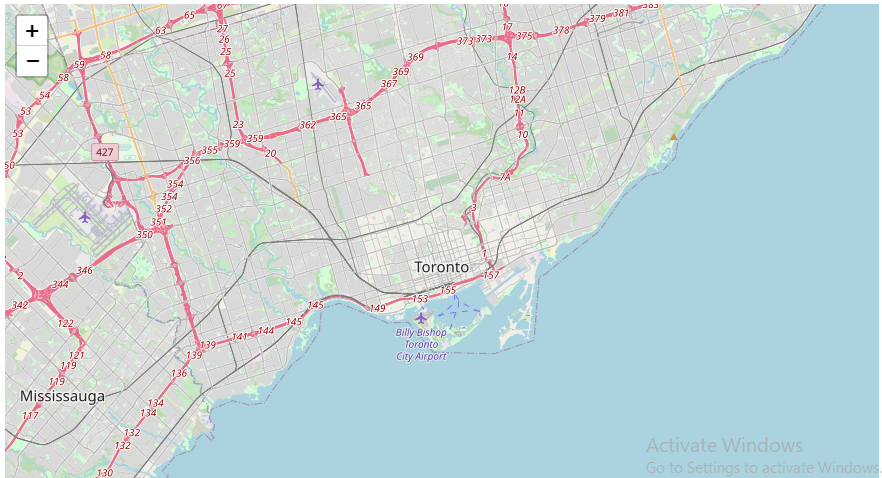

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("Toronto_map.png")

## Plotting the final neighborhood of Toronto Map

In [26]:
n = 91  # Unable to show Marker in Map if Marker > 91
clean_df1 = clean_df.tail(n)
clean_df1.shape

(91, 5)

In [27]:
import folium
my_map = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, label in zip(clean_df1['Latitude'], clean_df1['Longitude'], clean_df1['Neighborhood']):
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(my_map)  
my_map

### Showcasing map if not displayed in Github

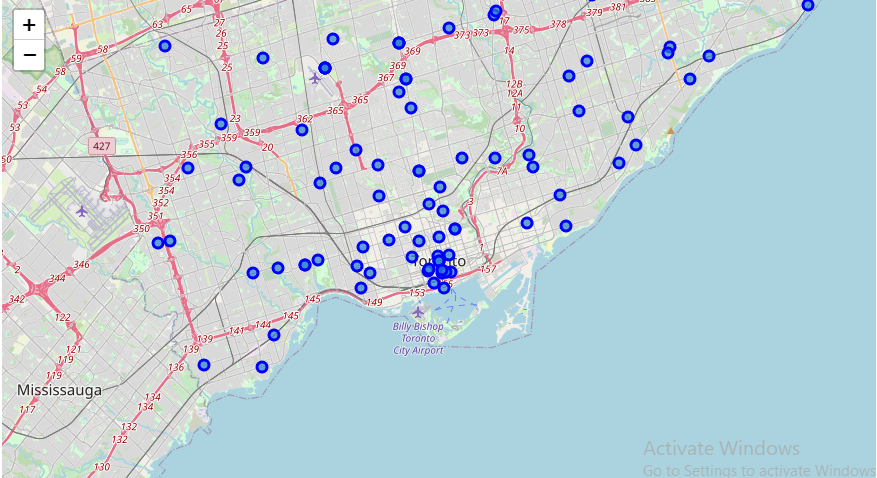

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("Toronto_Marked_Map.png")